In [3]:
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

## Helper functions

In [4]:
def form_triplets(df):
    triplets = []
    for i, row in df.iterrows():
        anchor = row
        anchor_label = row['label']
        positive_sample = df[df['label'] == anchor_label].sample(n=1).iloc[0]
        negative_sample = df[df['label'] != anchor_label].sample(n=1).iloc[0]
        triplets.append((anchor['index'], positive_sample['index'], negative_sample['index']))
    triplets = [(int(a), int(p), int(n)) for a, p, n in triplets]
    return triplets

## VoxCeleb2

In [9]:
data = '/data/amathur-23/DADA/VoxCeleb2/'
train = os.path.join(data, 'train')
train_0 = os.listdir(train)[0]
train_data = []
with open(os.path.join(train, train_0)) as f:
    file_data = json.load(f)
    train_data.append([file_data['transcription'], file_data['speaker_id'], file_data['gender']])
    

In [11]:
train_df = pd.DataFrame(train_data, columns=['transcription', 'speaker_id', 'gender'])  
train_df

,transcription,speaker_id,gender
0,"like I'm divorced, but now he wants me to co...",id00649,female


In [31]:
data = '/data/amathur-23/DADA/VoxCeleb2/train/meta.csv'
meta_df = pd.read_csv(data)
len(meta_df['speaker_id'].unique())
samples_per_speaker = meta_df['speaker_id'].value_counts()
top_100_speakers = samples_per_speaker.head(10).index
meta_df_small = meta_df[meta_df['speaker_id'].isin(top_100_speakers)]
unique_speakers = meta_df_small['speaker_id'].unique()

In [37]:
data = '/data/amathur-23/DADA/VoxCeleb2/'
train = os.path.join(data, 'train')
train_data = []
label_speaker_map = {}
for file in os.listdir(train)[:5000]:
    with open(os.path.join(train, file), 'r') as f: 
        file_data = json.load(f)
        train_data.append([file_data['transcription'], file_data['speaker_id'], file_data['gender']])
train_df = pd.DataFrame(train_data, columns=['transcription', 'speaker_id', 'gender'])  

## ASVspoof 2021 

In [14]:
csv_file = pd.read_csv('/home/infres/iivanova-23/DADA/iivanova-23/data/asvspoof2021/transcriptions_gpu.csv')
print(len(csv_file[csv_file['type']=='spoof']))
print(len(csv_file[csv_file['type']!='spoof']))
spoof_small = csv_file[csv_file['type']=='spoof'].sample(3000)
bonafide_small = csv_file[csv_file['type']!='spoof']
data_asv = pd.concat([spoof_small, bonafide_small])
data_asv['index'] = range(1, len(data_asv) + 1)
data_asv['tokens'] = data_asv['transcription'].apply(lambda x: len(x.split()))
print(data_asv['tokens'].describe())
data_asv.to_csv('/home/infres/iivanova-23/DADA/iivanova-23/data/asvspoof2021/transcriptions_small.csv', index=False)


51998
1934
count    4934.000000
mean        8.572152
std         6.037349
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max       333.000000
Name: tokens, dtype: float64


## In The Wild

In [5]:
wild_data = pd.read_csv('/data/iivanova-23/data/wild_transcription_meta.csv')
wild_data['author_name'].unique()

array(['Donald Trump', 'Franklin D. Roosevelt', 'Barack Obama',
       'Bernie Sanders', 'Ayn Rand', 'Alec Guinness', 'Bill Clinton',
       'George W. Bush', 'Richard Nixon', 'Christopher Hitchens',
       'Queen Elizabeth II', 'Gilbert Gottfried', 'Louis Farrakhan',
       'Martin Luther King', 'Ronald Reagan', 'John F. Kennedy',
       'Kanye West', 'Adam Driver', 'The Notorious B.I.G.', 'Alan Watts',
       'Winston Churchill', 'Alexandria Ocasio-Cortez', 'Milton Friedman',
       'Tucker Carlson', 'Dwight Eisenhower', 'John Cleese', 'Malcolm X',
       'Arnold Schwarzenegger', 'Nelson Mandela', 'Boris Johnson',
       'Robert Kardashian', 'Calvin Coolidge', 'Bill Burr',
       'Nick Offerman', 'Mitch Hedberg', 'George Carlin',
       'Lyndon Johnson', 'Mark Zuckerberg', 'Jeff Goldblum', 'Louis C.K.',
       'Fred Rogers', '2Pac', 'Norm MacDonald', 'Jerry Seinfeld',
       'Jimmy Carter', 'Scarlett Johansson', 'Frank Sinatra',
       'Billie Eilish', 'Orson Welles', 'Dave Chappelle

In [53]:

from sklearn.model_selection import train_test_split
data_wiki = pd.read_csv('~/DADA/Data/WikiQuotes_train.csv')
# data['index'] = range(1, len(data) + 1)
# data = data.to_csv('~/DADA/Data/WikiQuotes_train.csv', index=False)
# data_wiki = data_wiki[data_wiki['type'] != 'spoof']
# data_authors = data_wiki[data_wiki['label'] < 10]
# data_wild = pd.read_csv('/data/iivanova-23/DataDADA/wild_transcription_meta.csv')
# data_wild['tokens'] = data_wild['text'].apply(lambda x: len(x.split()))
# data_wild = data_wild[(data_wild['tokens'] > 5) & (data_wild['tokens'] < 40)]
# data_wild = data_wild[data_wild['label'] < 10]
# data_merged = pd.concat([data_authors, data_wild])
# # len(data_merged)
# data_real = data_merged[data_merged['type'] != 'spoof']
# data_spoof = data_merged[data_merged['type'] == 'spoof']
# train, test = train_test_split(data_real, test_size=0.3, random_state=42)
# data_merged.to_csv('/data/iivanova-23/DataDADA/train_merged.csv', index=False)

### In the wild dataset

In [3]:
def find_unique_authors_create_dataFrame(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    unique_authors = set()
    authors_list = []
    ids_list = []
    quotes_list = []
    types_list = []
    author_id_map = {}
    current_id = 0
    for item in data:
        author = item.get('speaker')
        if author:
            if author not in author_id_map:
                    author_id_map[author] = current_id
                    current_id += 1
            unique_authors.add(author)
            authors_list.append(author)
            ids_list.append(author_id_map[author])
            quotes_list.append(item.get('content'))
            types_list.append(item.get('label'))
    data = pd.DataFrame({
        'author_id': ids_list,
        'author_name': authors_list,
        'text': quotes_list,
        'type': types_list,
        'length': [len(quote) for quote in quotes_list]
    })
    data['author_name'] = data['author_name'].replace('JFK', 'John F. Kennedy').replace('FDR', 'Franklin D. Roosevelt').replace('Harry Truman', 'Harry S. Truman').replace('Mr. Rogers','Fred Rogers')
    author_id_map['John F. Kennedy'] = author_id_map.pop('JFK')
    author_id_map['Franklin D. Roosevelt'] = author_id_map.pop('FDR')
    author_id_map['Harry S. Truman'] = author_id_map.pop('Harry Truman')
    author_id_map['Fred Rogers'] = author_id_map.pop('Mr. Rogers')
    return unique_authors, data, author_id_map

In [14]:
def plot_author_quotes_count(data):
    quote_counts = data['author_name'].value_counts()
    plt.figure(figsize=(10, 8))
    quote_counts.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(quote_counts))))
    plt.title('Number of Quotes per Author')
    plt.xlabel('Author')
    plt.ylabel('Number of Quotes')
    plt.xticks(rotation=90)
    plt.show()
    return quote_counts

In [54]:
json_file_path = '/data/iivanova-23/data/wild_transcription_meta.json'
unique_authors, data_wild, author_id_map = find_unique_authors_create_dataFrame(json_file_path)
author_map_wiki = data_wiki[['author_name', 'label']].drop_duplicates().set_index('author_name').to_dict()['label']

,author_id,author_name,text,type,length
0,0,Donald Trump,"In fact, dead people.",bona-fide,22
1,1,Franklin D. Roosevelt,and the local government's act for whiz.,bona-fide,41
2,0,Donald Trump,But I have made clear our trade imbalance is ...,bona-fide,66
3,2,Barack Obama,under very difficult circumstances is far gre...,bona-fide,110
4,3,Bernie Sanders,in the modern history of the United States of...,bona-fide,86
...,...,...,...,...,...
2675,28,Nelson Mandela,We're a group of people.,spoof,25
2676,5,Alec Guinness,Our many acquaintance curious volum have forg...,spoof,56
2677,14,Ronald Reagan,fiercely observant.,bona-fide,20
2678,0,Donald Trump,But real pollsters.,bona-fide,20


In [67]:
labels_list = []
label = 10
for i,row in data_wild.iterrows():
    author = row['author_name']
    if author:       
        if author in author_map_wiki:
            labels_list.append(author_map_wiki[author])
        else: 
            author_map_wiki[author] = label
            labels_list.append(label)
            label += 1
            
data_wild['label'] = labels_list
data_wild['index'] = range(1, len(data_wild) + 1)

In [82]:
data_wild.to_csv('/data/iivanova-23/data/wild_transcription_meta.csv', index=False)

In [14]:
first_10_authors = data_wild[data_wild['label'] < 10]
spoof = first_10_authors[first_10_authors['type'] == 'spoof']
real = first_10_authors[first_10_authors['type'] != 'spoof']
train, test = train_test_split(real, test_size=0.3, random_state=42)

train_triples = form_triplets(train)
test_triples = form_triplets(test)
spoofed_triplets = form_triplets(spoof)
print(len(train_triples), len(test_triples), len(spoofed_triplets)) 

data_json = {'train': train_triples, 'test': test_triples, 'spoof': spoofed_triplets}

with open('/data/iivanova-23/data/index_10_authors_wild.json', 'w') as f:
    json.dump(data_json, f)

793 340 542


In [2]:
data = pd.read_csv('/data/iivanova-23/DataDADA/wild_transcription_meta.csv')
data = data[data['label'] < 10]

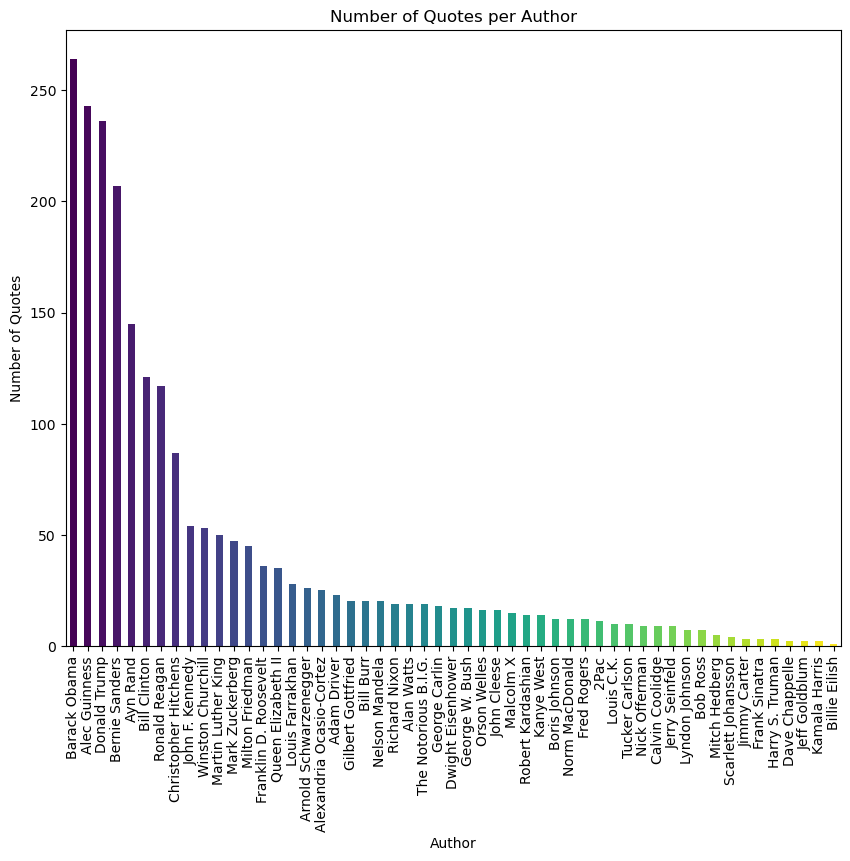

In [125]:
quotes_count = plot_author_quotes_count(data[data['length'] > 20])

### Wikiquotes

In [7]:
wild_data = pd.read_csv('/data/iivanova-23/data/wild_transcription_meta.csv')
author_id_map = wild_data[['author_name', 'label']].drop_duplicates().set_index('author_name').to_dict()['label']
author_id_map.keys()

dict_keys(['Donald Trump', 'Franklin D. Roosevelt', 'Barack Obama', 'Bernie Sanders', 'Ayn Rand', 'Alec Guinness', 'Bill Clinton', 'George W. Bush', 'Richard Nixon', 'Christopher Hitchens', 'Queen Elizabeth II', 'Gilbert Gottfried', 'Louis Farrakhan', 'Martin Luther King', 'Ronald Reagan', 'John F. Kennedy', 'Kanye West', 'Adam Driver', 'The Notorious B.I.G.', 'Alan Watts', 'Winston Churchill', 'Alexandria Ocasio-Cortez', 'Milton Friedman', 'Tucker Carlson', 'Dwight Eisenhower', 'John Cleese', 'Malcolm X', 'Arnold Schwarzenegger', 'Nelson Mandela', 'Boris Johnson', 'Robert Kardashian', 'Calvin Coolidge', 'Bill Burr', 'Nick Offerman', 'Mitch Hedberg', 'George Carlin', 'Lyndon Johnson', 'Mark Zuckerberg', 'Jeff Goldblum', 'Louis C.K.', 'Fred Rogers', '2Pac', 'Norm MacDonald', 'Jerry Seinfeld', 'Jimmy Carter', 'Scarlett Johansson', 'Frank Sinatra', 'Billie Eilish', 'Orson Welles', 'Dave Chappelle', 'Bob Ross', 'Harry S. Truman', 'Kamala Harris'])

Number of authors that have more then 100 quotes: 9


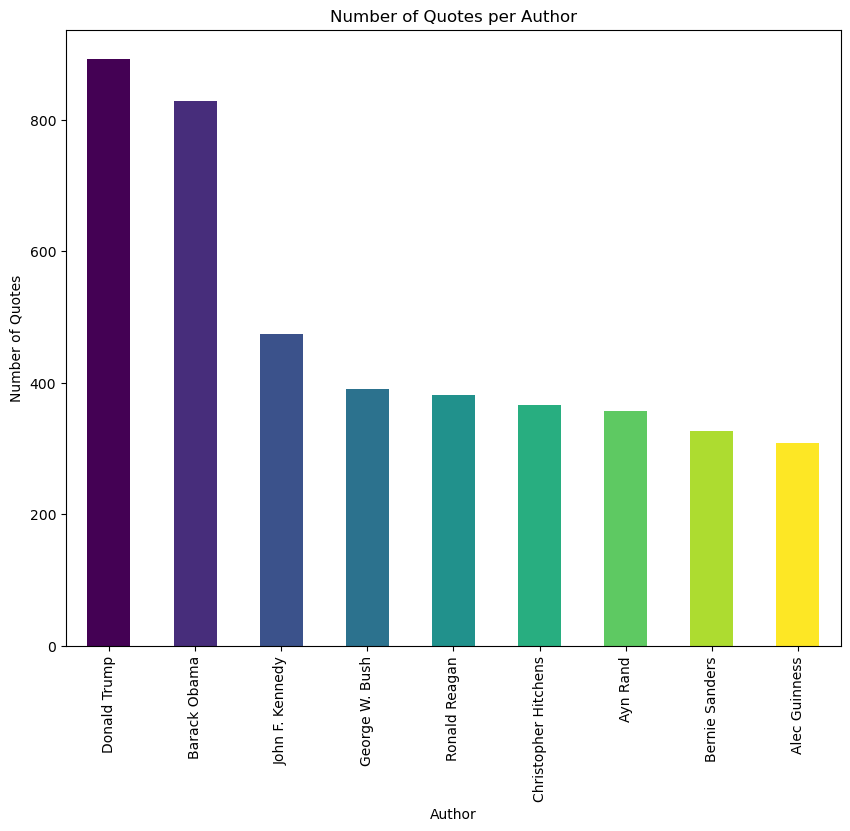

author_name
Donald Trump            892
Barack Obama            828
John F. Kennedy         474
George W. Bush          391
Ronald Reagan           381
Christopher Hitchens    366
Ayn Rand                357
Bernie Sanders          326
Alec Guinness           308
Name: count, dtype: int64

In [130]:
label_counts = data['label'].value_counts()
labels_to_keep = label_counts[label_counts >= 250].index
data_more_250 = data[data['label'].isin(labels_to_keep)]
print(f"Number of authors that have more then 100 quotes: {len(data_more_250['label'].unique())}")
plot_author_quotes_count(data_more_250)

In [57]:
def tokens_count(data):
    data['tokens'] = data['text'].apply(lambda x: len(x.split()))
    return data

def plot_tokens_distribution(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='author_name', y='tokens', data=data, palette='blend:#7AB,#EDA', hue='author_name')
    plt.title('Tokens Distribution per Author')
    plt.xlabel('Author')
    plt.ylabel('Number of Tokens')
    plt.xticks(rotation=90)
    plt.show()

# data = tokens_count(data)
# plot_tokens_distribution(data)

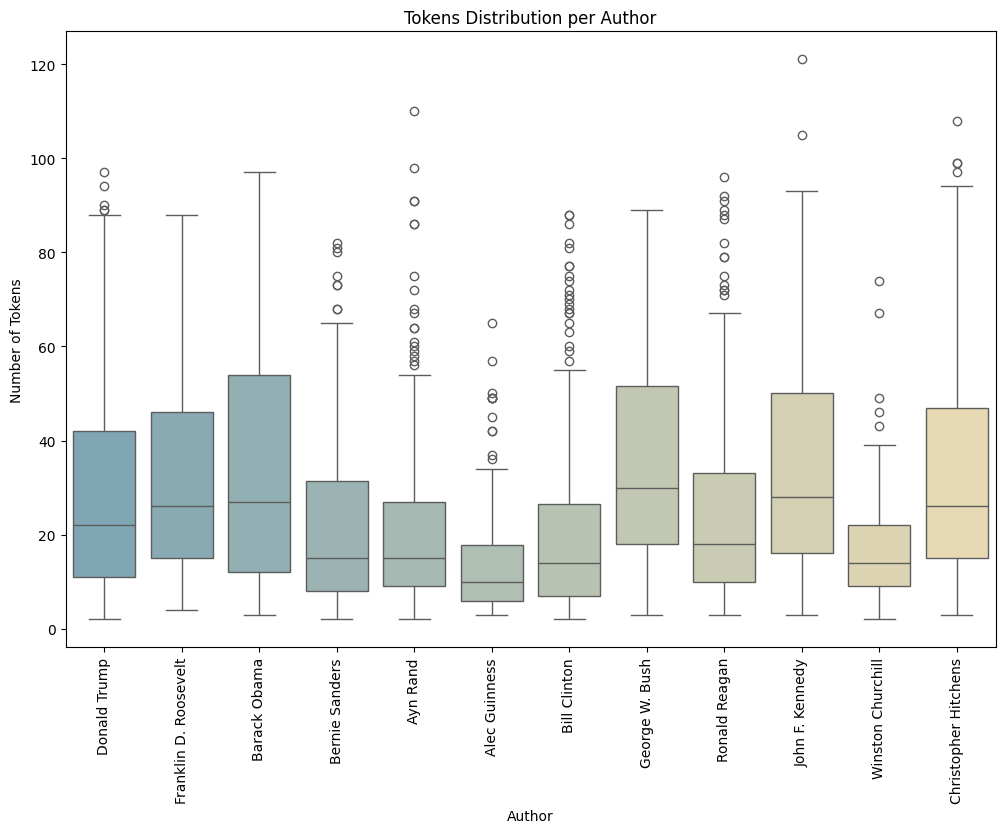

In [15]:
# data_small = tokens_count(data_small)
data_small['tokens'].mean()
plot_tokens_distribution(data_small)

In [174]:

wild_data = pd.read_csv('/data/iivanova-23/data/wild_transcription_meta.csv')
wild_data = wild_data.drop(columns=['author_id', 'index', 'label'])
wild_data['tokens'] = wild_data['text'].apply(lambda x: len(x.split()))
wild_data = wild_data[~wild_data['author_name'].isin(['Jimmy Carter', 'Dave Chappelle'])]

In [192]:
labels = wild_data['author_name'].unique()
author_id_map = {author: i for i, author in enumerate(labels)}
wild_data['label'] = wild_data['author_name'].map(author_id_map)

In [193]:
author_id_map = wild_data[['author_name', 'label']].drop_duplicates().set_index('author_name').to_dict()['label']
author_id_map

{'Donald Trump': 0,
 'Franklin D. Roosevelt': 1,
 'Barack Obama': 2,
 'Bernie Sanders': 3,
 'Ayn Rand': 4,
 'Alec Guinness': 5,
 'Bill Clinton': 6,
 'George W. Bush': 7,
 'Richard Nixon': 8,
 'Christopher Hitchens': 9,
 'Queen Elizabeth II': 10,
 'Gilbert Gottfried': 11,
 'Louis Farrakhan': 12,
 'Martin Luther King': 13,
 'Ronald Reagan': 14,
 'John F. Kennedy': 15,
 'Kanye West': 16,
 'Adam Driver': 17,
 'The Notorious B.I.G.': 18,
 'Alan Watts': 19,
 'Winston Churchill': 20,
 'Alexandria Ocasio-Cortez': 21,
 'Milton Friedman': 22,
 'Tucker Carlson': 23,
 'Dwight Eisenhower': 24,
 'John Cleese': 25,
 'Malcolm X': 26,
 'Arnold Schwarzenegger': 27,
 'Nelson Mandela': 28,
 'Boris Johnson': 29,
 'Robert Kardashian': 30,
 'Calvin Coolidge': 31,
 'Bill Burr': 32,
 'Nick Offerman': 33,
 'Mitch Hedberg': 34,
 'George Carlin': 35,
 'Lyndon Johnson': 36,
 'Mark Zuckerberg': 37,
 'Jeff Goldblum': 38,
 'Louis C.K.': 39,
 'Fred Rogers': 40,
 '2Pac': 41,
 'Norm MacDonald': 42,
 'Jerry Seinfeld': 43

In [194]:
import os
folder_path = '/data/iivanova-23/data/'
metadata_file = os.path.join(folder_path, 'quotes-500-en-sources.csv')
metadata_df = pd.read_csv(metadata_file)
quotes_file = os.path.join(folder_path, 'quotes-500-en-quotes.csv')
quotes_df = pd.read_csv(quotes_file)
filtered_quotes_df = quotes_df[quotes_df['source_id'].isin(metadata_df[metadata_df['name'].isin(author_id_map.keys())]['source_id'])]
source_id_to_name = dict(zip(metadata_df['source_id'], metadata_df['name']))
filtered_quotes_df['author_name'] = filtered_quotes_df['source_id'].map(source_id_to_name)
new_data = pd.DataFrame({
    'label': filtered_quotes_df['author_name'].map(author_id_map),
    'author_name': filtered_quotes_df['author_name'],
    'text': filtered_quotes_df['quote'],
    'type': 'bona-fide',
    'length': filtered_quotes_df['quote'].apply(len),
    'tokens': filtered_quotes_df['quote'].apply(lambda x: len(x.split()))
})
all_data = pd.concat([wild_data, new_data])

/tmp/ipykernel_1691255/1305104938.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_quotes_df['author_name'] = filtered_quotes_df['source_id'].map(source_id_to_name)


In [196]:
def truncate_data(data, max_tokens):
    data_new = []
    for i in range(len(data)):
        text = data.iloc[i]['text']
        words = text.split()
        tokens = data.iloc[i]['tokens']
        for j in range(0, tokens, max_tokens):
            chunk = ' '.join(words[j:j + max_tokens])
            # print(chunk, len(chunk.split()))
            if len(chunk.split()) > 5:
                data_new.append({
                    'text': chunk,
                    'author_name': data.iloc[i]['author_name'],
                    'tokens': len(chunk.split()), 
                    'label': data.iloc[i]['label'],
                    'length': len(chunk), 
                    'type': data.iloc[i]['type'],
                    
                })

    df = pd.DataFrame(data_new)
    return df

wiki_quotes_truncated = truncate_data(all_data, 64)
wiki_quotes_truncated['index'] = range(1, len(wiki_quotes_truncated) + 1)
all_data_real = wiki_quotes_truncated[wiki_quotes_truncated['type'] != 'spoof']
all_data_spoof = wiki_quotes_truncated[wiki_quotes_truncated['type'] == 'spoof']
 
wiki_quotes_truncated.to_csv('/data/iivanova-23/data/wiki_train.csv', index=False)
train, test = train_test_split(all_data_real, test_size=0.3, random_state=42)
train_triples = form_triplets(train)
test_triples = form_triplets(test)
spoofed_triplets = form_triplets(all_data_spoof)
print(len(train_triples), len(test_triples), len(spoofed_triplets))

data_json = {'train': train_triples, 'test': test_triples, 'spoof': spoofed_triplets}

with open('/data/iivanova-23/data/index_wiki.json', 'w') as f:
    json.dump(data_json, f)

3038 1302 807


In [14]:
import pandas as pd
data = pd.read_csv('../../Data/WikiQuotes_train.csv')

In [17]:
rest_of_data = data[(data['label'] >= 3) & (data['label'] < 6)]
rest_of_data['label'].unique()


array([3, 4, 5])

In [10]:
data['label'] = data['label'].astype('int')
label_counts = data['label'].value_counts()
# label_counts
label_mapping = {old_label: new_label for new_label, old_label in enumerate(label_counts.index)}
data['label'] = data['label'].map(label_mapping)
author_id_map = data[['label', 'author_name']].drop_duplicates().set_index('label').to_dict()['author_name']
author_id_map

{8: 'Franklin D. Roosevelt',
 1: 'Donald Trump',
 0: 'Barack Obama',
 7: 'Bernie Sanders',
 6: 'Ayn Rand',
 9: 'Alec Guinness',
 3: 'George W. Bush',
 11: 'Bill Clinton',
 4: 'Ronald Reagan',
 2: 'John F. Kennedy',
 5: 'Christopher Hitchens',
 10: 'Winston Churchill'}

In [11]:
data_to_train = data[data['label'] <3]
data_to_train

,text,author_name,tokens,label,length,type
1,But I have made clear our trade imbalance is j...,Donald Trump,12,1,65,bona-fide
2,under very difficult circumstances is far grea...,Barack Obama,17,0,109,bona-fide
4,And advanced economies like my own unions have...,Barack Obama,16,0,109,bona-fide
5,My own family is made up of.,Barack Obama,7,0,28,bona-fide
8,things that were unacceptable to us.,Donald Trump,6,1,36,bona-fide
...,...,...,...,...,...,...
4577,The very word 'secrecy' is repugnant in a free...,John F. Kennedy,32,2,188,bona-fide
4579,If a free society cannot help the many who are...,John F. Kennedy,19,2,89,bona-fide
4581,Our most basic common link is that we all inha...,John F. Kennedy,29,2,152,bona-fide
4587,The path we have chosen for the present is ful...,John F. Kennedy,45,2,234,bona-fide
